# 03: Jaynes-Cummings Model and the Rotating Wave Approximation

In this tutorial we will construct the Jaynes-Cummings Hamiltonian (with and without the RWA) and see how the system evolves under the Schrodinger equation (that is, without dissipation) .
We will use this to investigate the limits of the RWA in the JCM.

The Jaynes-Cumming model is the simplest possible model of quantum mechanical light-matter interaction, describing a single two-level atom interacting with a single electromagnetic cavity mode. The full Hamiltonian for the system (in dipole interaction form) is given by

$$H = H_{\rm atom} + H_{\rm cavity} + H_{\rm interact}$$

The atom Hamiltonian we use in this case is

$$\frac{1}{2} \hbar \omega_{a} \sigma_z$$

where $\omega_a$ is the system frequency.

Note that the Hamiltonian for the atom may take numerous forms. Any Hermitean operator on a two-level state is possible, but it is useful to nomalize the operator so that the difference between its eigenvalues is $1$ so that $\omega_a$ has consistent units.

The cavity Hamiltonian is given by

$$H_{\rm cavity} = \hbar \omega_c a^\dagger a$$

where $\omega_c$ is $\omega_a$ is the frequencies of the cavity and $a$ and $a^\dagger$ are the annihilation and creation operators of the cavity respectively.

The interaction Hamiltonian is given by

$$H_{\rm interact} = \hbar g(a^\dagger + a)(\sigma_- + \sigma_+)$$

or with the rotating-wave approximation

$$H_{\rm interact-RWA} = \hbar g(a^\dagger\sigma_- + a\sigma_+)$$

where $\sigma_-$ and $\sigma_+$ are the annihilation and creation operators for the atom respectively.

Note that in this notebook we will work in units where $\hbar=1$.

## Tasks

- [Construct the Hamiltonian](#construct-the-hamiltonian)
- [Solve the Schrodinger equation](#solve-the-schrodinger-equation)
- [Visualise the evolution](#visualise-the-evolution)
- [Compare the RWA and non-RWA](#compare-the-rwa-and-non-rwa)

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import qutip
import numpy as np

## Helper functions

In [3]:
def display_eigenstates(op):
    """ Display the eigenvalues and eigenstates of an operator. """
    evals, evecs = op.eigenstates()
    print("Eigenvalues:", evals)
    print()
    print("Eigenstates")
    print("===========")
    for v in evecs:
        display(v)

In [4]:
def jcm_h(wc, wa, g, N, atom):
    """ Construct the Jaynes-Cummings Hamiltonian (non-RWA). """
    a = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
    sm = qutip.tensor(qutip.qeye(N), qutip.sigmam())
    atom = qutip.tensor(qutip.qeye(N), atom)
    
    H = wc * a.dag() * a + wa * atom + g * (a.dag() + a) * (sm + sm.dag())
    return H

In [5]:
def jcm_rwa_h(wc, wa, g, N, atom):
    """ Construct the Jaynes-Cummings Hamiltonian (RWA). """
    a = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
    sm = qutip.tensor(qutip.qeye(N), qutip.sigmam())
    atom = qutip.tensor(qutip.qeye(N), atom)

    H = wc * a.dag() * a + wa * atom + g * (a.dag() * sm + a * sm.dag())
    return H

## Construct the Hamiltonian

- add variables for the atom and cavity parameters
- create the operators for the JCM Hamiltonian
- combine into the JCM Hamiltonian (no RWA)
- look at the energy eigenvalues and eigenstates of the Hamiltonian

Here are some example parameter values to start with:

$
  \omega_c = 2 \pi \\
  \omega_a = 2 \pi \\
  g = 0.05 \cdot 2 \pi \\
$

In [6]:
# system parameters
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi # 0.05 * 2 * np.pi  # coupling strength
N = 15  # number of cavity fock states

In [7]:
# operators for the JCM
# this is the annihilation operator for the cavity (note it acts trivally on the atom) 
a = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
# note the creation operator for the cavity is given by a.dag() - that is a "dagger"

# this is annihilation operator for the atom (note it acts trivally on the cavity)
sm = qutip.tensor(qutip.qeye(N), qutip.sigmam())

In [8]:
# hamiltonian of atom
H_atom = 0.5 * qutip.sigmaz()

In [9]:
# hamiltonian (non-rwa)
H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [10]:
display_eigenstates(H)

Eigenvalues: [-7.85889344e-03  5.96126089e+00  6.58938206e+00  1.21144878e+01
  1.30025059e+01  1.82980462e+01  1.93852982e+01  2.44973215e+01
  2.57523736e+01  3.07066509e+01  3.21093947e+01  3.69231295e+01
  3.84592664e+01  4.31450310e+01  4.48037151e+01  4.93712306e+01
  5.11438657e+01  5.56009463e+01  5.74804999e+01  6.18336091e+01
  6.38141870e+01  6.80687891e+01  7.01453568e+01  7.43061538e+01
  7.64743463e+01  8.05458680e+01  8.28020375e+01  8.68443187e+01
  8.91878173e+01  9.43576629e+01]

Eigenstates


Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [-9.99686865e-01]
 [ 2.50078015e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-8.84435600e-04]
 [ 1.91545770e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.78964167e-07]
 [ 8.92682948e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.82246607e-10]
 [ 3.01406956e-12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 6.98208962e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.15466754e-01]
 [ 2.47078307e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.04441470e-03]
 [ 2.57998120e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.12442730e-07]
 [ 1.44264408e-08]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.15509560e-10]
 [ 5.54390511e-12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 7.15893465e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.97748812e-01]
 [-2.53352264e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.12590764e-03]
 [-2.85176960e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.07440058e-07]
 [-1.66249825e-08]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.69704236e-10]
 [-6.57790667e-12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [-1.80040304e-02]
 [-6.94264443e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.18862683e-01]
 [-3.01174415e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.45575988e-03]
 [-4.00072715e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.20418458e-06]
 [-2.62495495e-08]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.11660424e-10]
 [-1.13707713e-11]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 1.73789310e-02]
 [ 7.19283745e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.93795657e-01]
 [-3.12062484e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.61908216e-03]
 [-4.60986993e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.43748474e-06]
 [-3.20827610e-08]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.65414952e-10]
 [-1.44829422e-11]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 6.68738601e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.55755668e-02]
 [ 6.91165605e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.21409193e-01]
 [ 3.46535170e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.85901682e-03]
 [ 5.57567367e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.80583773e-06]
 [ 4.19757989e-08]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.03479010e-09]
 [ 2.02383857e-11]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 5.87238370e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.44909646e-02]
 [ 7.21826125e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.90689693e-01]
 [-3.61960170e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.11776763e-03]
 [-6.63312716e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.24342019e-06]
 [-5.36747415e-08]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.36194038e-09]
 [-2.72196507e-11]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [-1.50214548e-05]
 [-1.17133393e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.14444667e-02]
 [-6.88503156e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.23516315e-01]
 [-3.86306044e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.25635855e-03]
 [-7.28686590e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.51503009e-06]
 [-6.18751253e-08]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.60441833e-09]
 [-3.28576879e-11]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 1.22969628e-05]
 [ 1.00801095e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.99079953e-02]
 [ 7.23929881e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.88020868e-01]
 [-4.06253481e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.62301250e-03]
 [-8.90579008e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.23142335e-06]
 [-8.21946233e-08]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.20351485e-09]
 [-4.62687826e-11]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.01467289e-12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 3.91577190e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.04421135e-05]
 [ 1.67319037e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.64348494e-02]
 [ 6.86118583e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.25342830e-01]
 [ 4.22107314e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.64891551e-03]
 [ 9.12042738e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.32960176e-06]
 [ 8.61858592e-08]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.33947862e-09]
 [ 4.99711095e-11]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.11088902e-12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 2.96035326e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.43362878e-05]
 [ 1.41444434e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.44479326e-02]
 [ 7.25753505e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.85630382e-01]
 [-4.46578903e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.13491183e-03]
 [-1.14150805e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 4.40693251e-06]
 [-1.18403072e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.33596780e-09]
 [-7.32744713e-11]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.67506834e-12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 7.56197211e-09]
 [ 8.88758366e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 4.87181361e-05]
 [ 2.17999310e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 4.08653482e-02]
 [ 6.83930622e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.26970130e-01]
 [ 4.54902731e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.03738629e-03]
 [ 1.10653423e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.24758749e-06]
 [ 1.15121565e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.25837807e-09]
 [ 7.23486268e-11]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.66617669e-12]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [-5.34337161e-09]
 [-6.54133667e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.81187991e-05]
 [-1.81334916e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.84278040e-02]
 [-7.27378239e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.83436824e-01]
 [ 4.83906336e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.65334267e-03]
 [ 1.41508641e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.77504924e-06]
 [ 1.63040187e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.80679410e-09]
 [ 1.10044933e-10]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.61295542e-12]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 1.60345299e-10]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.88140995e-08]
 [ 1.56086053e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.96760071e-05]
 [ 2.69284175e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 4.48991821e-02]
 [ 6.81891021e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.28446535e-01]
 [ 4.85320475e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.42225375e-03]
 [ 1.31126507e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.26719425e-06]
 [ 1.48875963e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.37905162e-09]
 [ 1.00727881e-10]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[-1.05435584e-10]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.29279477e-08]
 [-1.12079989e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.34489015e-05]
 [-2.20686062e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.20102189e-02]
 [-7.28852316e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.81391852e-01]
 [ 5.18866837e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.17813334e-03]
 [ 1.71050008e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.34066404e-06]
 [ 2.16831475e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.66514110e-09]
 [ 1.58456141e-10]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [-2.74374404e-12]
 [-4.31180695e-10]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.57170865e-08]
 [-2.41550201e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-9.31512946e-05]
 [-3.21194087e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.86332216e-02]
 [-6.79968353e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.29803507e-01]
 [-5.13796888e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.80387709e-03]
 [-1.52549096e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.38677694e-06]
 [-1.87626312e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 5.71472057e-09]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 1.69175372e-12]
 [ 2.75404112e-10]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.39121046e-08]
 [ 1.69505471e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.01511500e-05]
 [ 2.59600478e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 4.52917625e-02]
 [ 7.30207144e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.79463984e-01]
 [-5.51898292e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 4.70911142e-03]
 [-2.02708468e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 9.10851618e-06]
 [-2.80491463e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.95449626e-09]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.88940188e-12]
 [ 8.75719332e-10]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 5.91399441e-08]
 [ 3.45843478e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.19014036e-04]
 [ 3.73725222e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 5.21305345e-02]
 [ 6.78140798e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.31062884e-01]
 [ 5.40649613e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.18253737e-03]
 [ 1.74858258e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.60480668e-06]
 [ 2.31306669e-07]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.72333141e-12]
 [-5.44269976e-10]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.86363286e-08]
 [-2.37500824e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-8.80867368e-05]
 [-2.98139789e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.83353494e-02]
 [-7.31464520e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.77631361e-01]
 [ 5.83319265e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.24611776e-03]
 [ 2.36429019e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.10832103e-05]
 [ 3.54338194e-07]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.70009110e-11]
 [ 1.53916315e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.98897222e-08]
 [ 4.69487647e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.47161712e-04]
 [ 4.26866622e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 5.54348982e-02]
 [ 6.76392475e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.32240555e-01]
 [ 5.66118381e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.55846251e-03]
 [ 1.97999396e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-8.90680557e-06]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 9.89861754e-12]
 [ 9.32195187e-10]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 5.73805709e-08]
 [ 3.15877046e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.07144920e-04]
 [ 3.36346201e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 5.11846658e-02]
 [ 7.32640307e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.75878074e-01]
 [-6.13370076e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 5.78900971e-03]
 [-2.72164492e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.32471025e-05]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.15095513e-11]
 [-2.46799404e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.28742539e-07]
 [-6.12977985e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.77512125e-04]
 [-4.80605660e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.85781674e-02]
 [-6.74711399e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.33348504e-01]
 [-5.90389340e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 4.93180068e-03]
 [-2.21445322e-04]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.78659819e-11]
 [-1.45841110e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-8.03896014e-08]
 [-4.04457184e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.27235479e-04]
 [-3.74251097e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.38715074e-02]
 [-7.33746465e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.74192121e-01]
 [ 6.42237241e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.33757944e-03]
 [ 3.09084059e-04]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 5.30135747e-11]
 [ 3.71032235e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.76454073e-07]
 [ 7.76793212e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.09998372e-04]
 [ 5.34930314e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.15844284e-02]
 [ 6.73088930e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.34395780e-01]
 [ 6.13591412e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.28070671e-03]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.93061644e-11]
 [-2.14155134e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.07882187e-07]
 [-5.03076641e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.48283225e-04]
 [-4.11878629e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.64198122e-02]
 [-7.34791720e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.72565628e-01]
 [ 6.70032656e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.85457384e-03]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.19106703e-12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.32896432e-11]
 [ 5.31646477e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.33791885e-07]
 [ 9.61520627e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.44600233e-04]
 [ 5.89924666e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.44852307e-02]
 [ 6.71677540e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.35307288e-01]
 [ 6.30814403e-02]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.49148286e-11]
 [-2.99867099e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.40008236e-07]
 [-6.11381278e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.70172475e-04]
 [-4.49121660e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.88342166e-02]
 [-7.35642054e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.71264882e-01]
 [ 6.89388225e-02]
 [ 0.00000000e+00]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.96045264e-12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.25181842e-10]
 [-7.39975091e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.04498488e-07]
 [-1.18110211e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.85190233e-04]
 [-6.56115685e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.87346066e-02]
 [-6.88258616e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.22172072e-01]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.28386665e-11]
 [-3.89173271e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.70410851e-07]
 [-7.03393772e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.86445173e-04]
 [-4.70940244e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.94943418e-02]
 [-7.19753835e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.91659329e-01]]

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.84382792e-12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.72322309e-10]
 [-9.76667142e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.91643084e-07]
 [-1.48958630e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.60499226e-04]
 [-8.34751079e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-9.30707409e-02]
 [-9.95624440e-01]
 [ 0.00000000e+00]]

## Solve the Schrodinger equation

- create the initial state of the system (use the state with no photons and the spin system in its excited state)
- evolve the system for some time, saving the result.

If you need to remind yourself of how sesolve, remember that you can type `qutip.sesolve?` into a notebook cell to bring up the documentation.

In [11]:
# initial state
psi0 = qutip.basis([N, 2], [0, 0])  # start with an excited atom
psi0

Quantum object: dims = [[15, 2], [1, 1]], shape = (30, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [12]:
# Solve using sesolve
tlist = np.linspace(0, 25, 101)
result = qutip.sesolve(H, psi0, tlist)

## Visualise the evolution

- create expectation operators for observing the state of the system.
- add these to sesolve
- plot the expectation values together on a set of axes
- change the value of g and see how it affects the period

Two good expectation operators to use are the projectors on the light and matter sub-systems.

In [13]:
# Operators to determine the expectation values of:
eop_a = a.dag() * a  # light
eop_sm = sm.dag() * sm  # matter

In [14]:
# Solve using sesolve
tlist = np.linspace(0, 25, 101)
result = qutip.sesolve(H, psi0, tlist, e_ops=[eop_a, eop_sm])

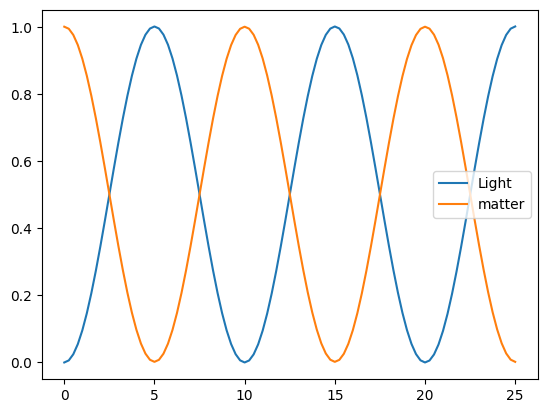

In [15]:
plt.plot(tlist, result.expect[0], label="Light")
plt.plot(tlist, result.expect[1], label="matter")
plt.legend();

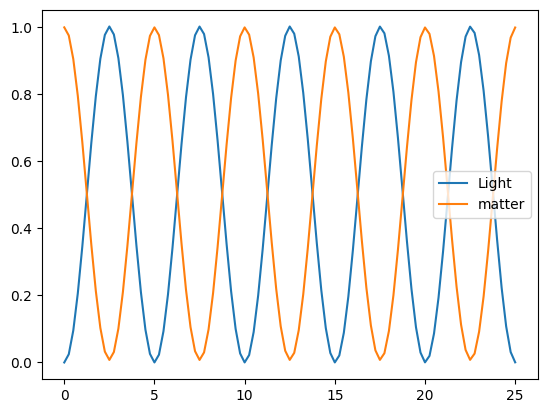

In [16]:
# vary g
H = jcm_h(wc, wa, 0.1 * 2 * np.pi, N, H_atom)

tlist = np.linspace(0, 25, 101)

result = qutip.sesolve(H, psi0, tlist, e_ops=[eop_a, eop_sm])

plt.plot(tlist, result.expect[0], label="Light")
plt.plot(tlist, result.expect[1], label="matter")
plt.legend();

## Compare the RWA and non-RWA

- construct another Hamiltonian that uses the RWA
- evolve the system under the RWA Hamiltonian.
- add the results to the plot
- experiment with parameters to determine where the RWA non-RWA diverges

In [17]:
# Construct the RWA Hamiltonian
H = jcm_h(wc, wa, g, N, H_atom)
H_RWA = jcm_rwa_h(wc, wa, g, N, H_atom)

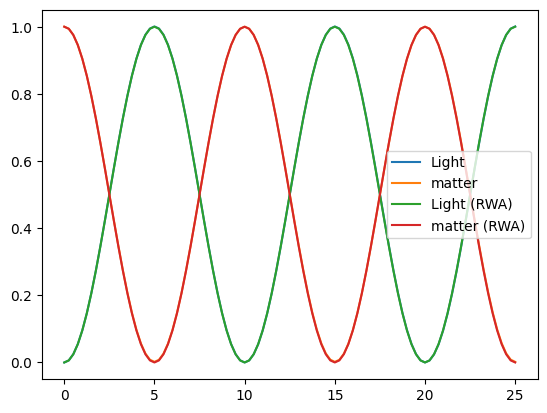

In [18]:
# Hmm. The results look the same.
tlist = np.linspace(0, 25, 101)

result = qutip.sesolve(H, psi0, tlist, e_ops=[eop_a, eop_sm])
plt.plot(tlist, result.expect[0], label="Light")
plt.plot(tlist, result.expect[1], label="matter")

result_rwa = qutip.sesolve(H_RWA, psi0, tlist, e_ops=[eop_a, eop_sm])
plt.plot(tlist, result_rwa.expect[0], label="Light (RWA)")
plt.plot(tlist, result_rwa.expect[1], label="matter (RWA)")

plt.legend();

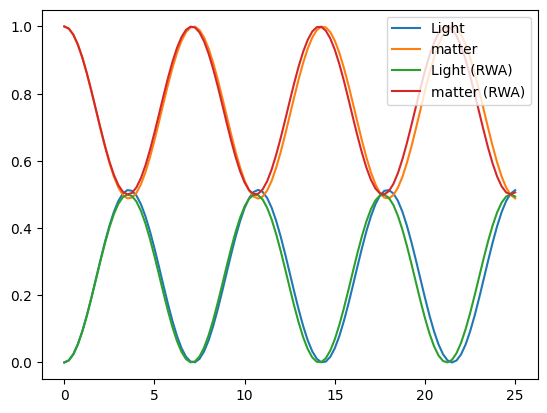

In [19]:
# Try with different frequencies w_c and w_a:
tlist = np.linspace(0, 25, 101)
f = 0.9

H = jcm_h(wc, f * wa, g, N, H_atom)
H_RWA = jcm_rwa_h(wc, f * wa, g, N, H_atom)

result = qutip.sesolve(H, psi0, tlist, e_ops=[eop_a, eop_sm])
plt.plot(tlist, result.expect[0], label="Light")
plt.plot(tlist, result.expect[1], label="matter")

result_rwa = qutip.sesolve(H_RWA, psi0, tlist, e_ops=[eop_a, eop_sm])
plt.plot(tlist, result_rwa.expect[0], label="Light (RWA)")
plt.plot(tlist, result_rwa.expect[1], label="matter (RWA)")

plt.legend();

## Links for further study

There is an excellent paper [The Jaynes-Cummings model and its descendants](https://arxiv.org/abs/2202.00330) by Larson and Mavrogordatos, that reviews the Jaynes-Cummings model and its many variations. You can try reading this paper and implementing some of the simpler variants in QuTiP.

If you do, please consider polishing your notebook, adding good explanations to it and submitting it as an example for others by opening a pull request for it at https://github.com/qutip/qutip-tutorials/.

This paper covers a *lot* of work, so don't expect to understand all of it quickly. Start with the earlier sections. We will explore the Jaynes-Cumming model more in the remaining tutorials.